In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")

### 2.1  Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.


In [4]:
tour_df = pd.read_csv("Holiday_Package.csv")
tour_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [5]:
tour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [6]:
tour_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,NaN,NaN,NaN,436.5,251.869014,1.0,218.75,436.5,654.25,872.0
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Correlation Plot

<AxesSubplot:>

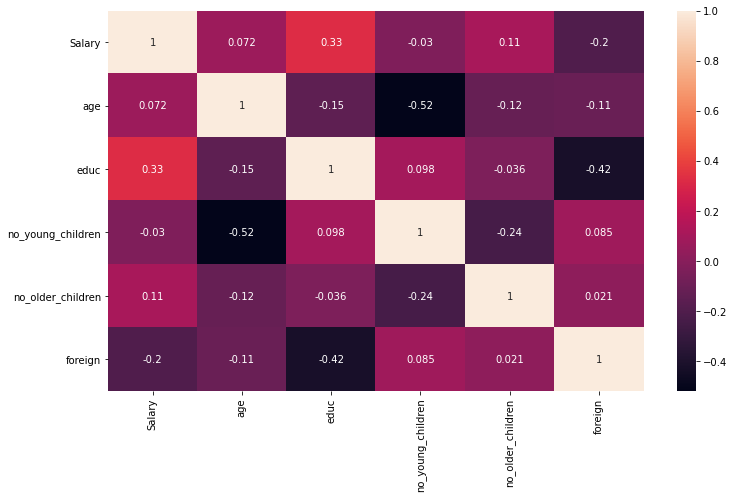

In [308]:
plt.figure(figsize=(12,7))
sns.heatmap(X.iloc[:].corr(),annot=True)

In [7]:
tour_df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [8]:
for feature in tour_df.columns: 
    if tour_df[feature].dtype == 'object':
        tour_df[feature] = pd.Categorical(tour_df[feature]).codes 

In [9]:
tour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         872 non-null    int64
 1   Holliday_Package   872 non-null    int8 
 2   Salary             872 non-null    int64
 3   age                872 non-null    int64
 4   educ               872 non-null    int64
 5   no_young_children  872 non-null    int64
 6   no_older_children  872 non-null    int64
 7   foreign            872 non-null    int8 
dtypes: int64(6), int8(2)
memory usage: 42.7 KB


In [10]:
tour_df.shape

(872, 8)

There are total 872 rows and 8 columns.

In [11]:
dups = tour_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
tour_df[dups]

Number of duplicate rows = 0


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


There are no duplicate values.

In [12]:
tour_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,0,48412,30,8,1,1,0
1,2,1,37207,45,8,0,1,0
2,3,0,58022,46,9,0,0,0
3,4,0,66503,31,11,2,0,0
4,5,0,66734,44,12,0,2,0


### Univariate Analysis

Unnamed: 0
Skew : 0.0


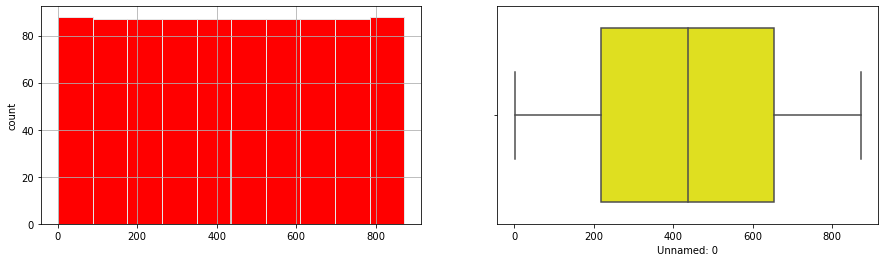

Holliday_Package
Skew : 0.16


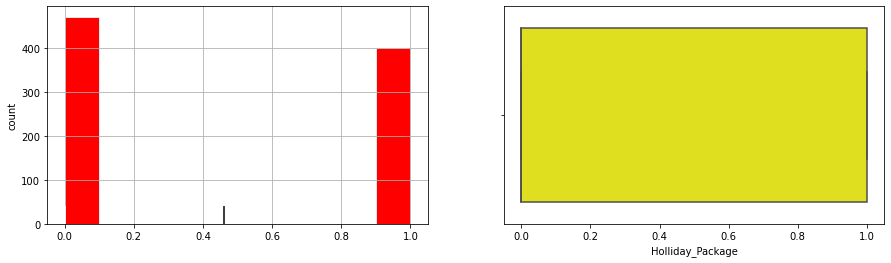

Salary
Skew : 3.1


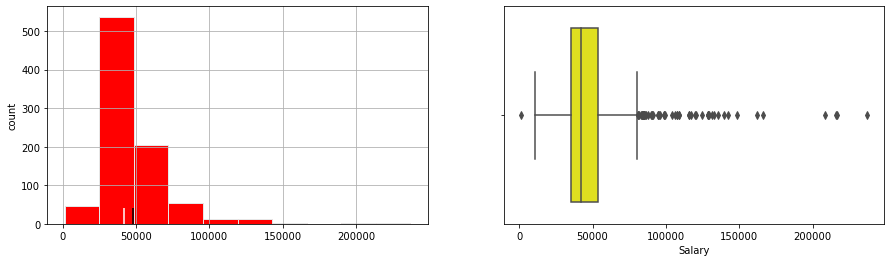

age
Skew : 0.15


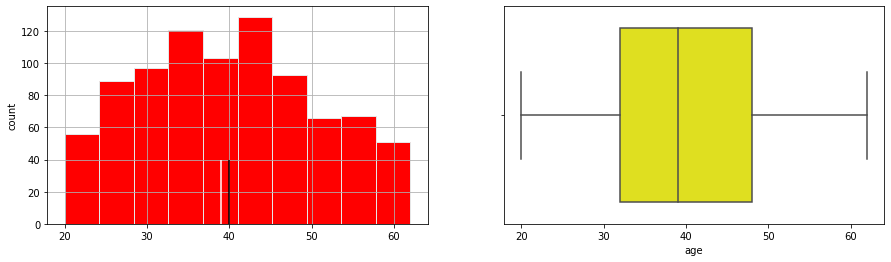

educ
Skew : -0.05


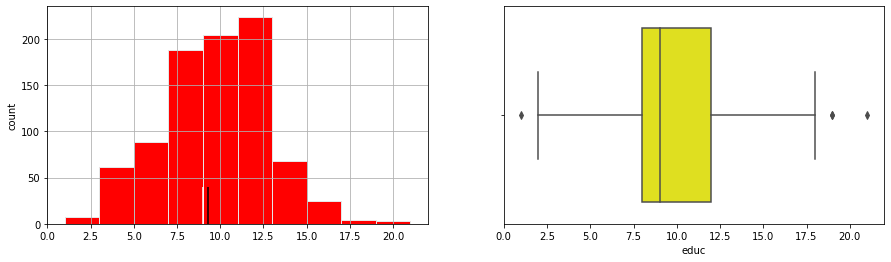

no_young_children
Skew : 1.95


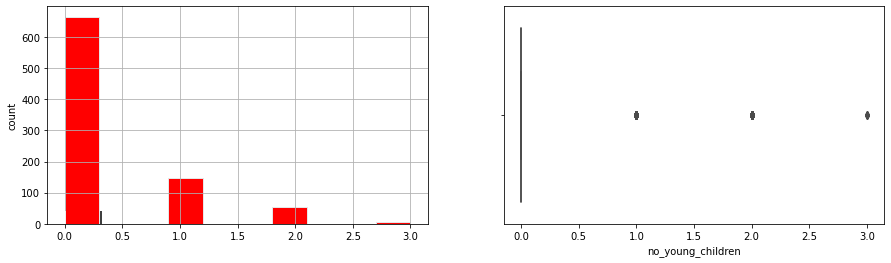

no_older_children
Skew : 0.95


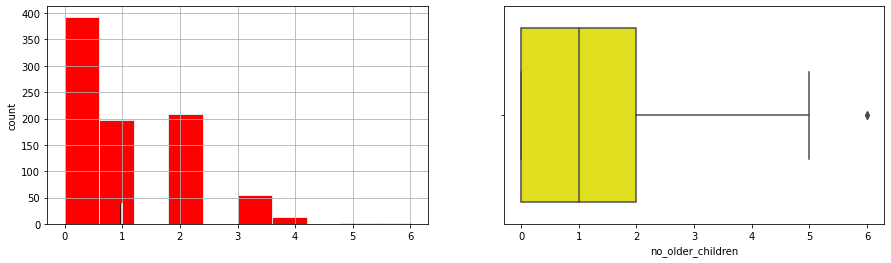

foreign
Skew : 1.17


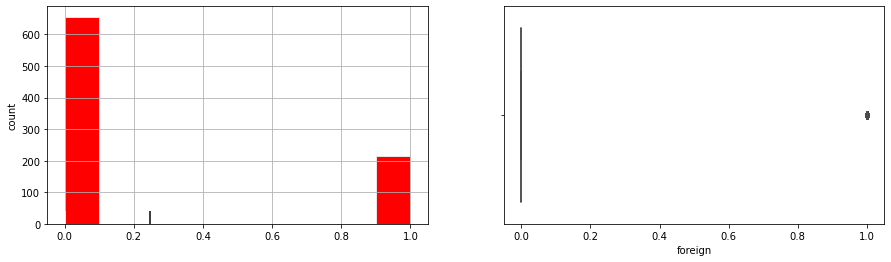

In [15]:
cont_cols = list(tour_df.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(tour_df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    tour_df[col].hist(bins=10,edgecolor='#E6E6E6', color='Red')
    plt.vlines(tour_df[col].mean(),ymin = 0, ymax = 40,color = 'Black')
    plt.vlines(tour_df[col].median(),ymin = 0, ymax = 40,color = 'White')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(tour_df[col],color='Yellow')
    plt.show()

The diagram shows that Holiday Package, Age, Salary, No young children, no older children, foreign are right skewed whereas education is left skewed.

The Salary and no young children have highly skewed.

The variables Salary, Education,No young chilren,no older children, Foreign have outliers.

The variables Age, Holiday package and Unnamed:0 does not posses any outliers.

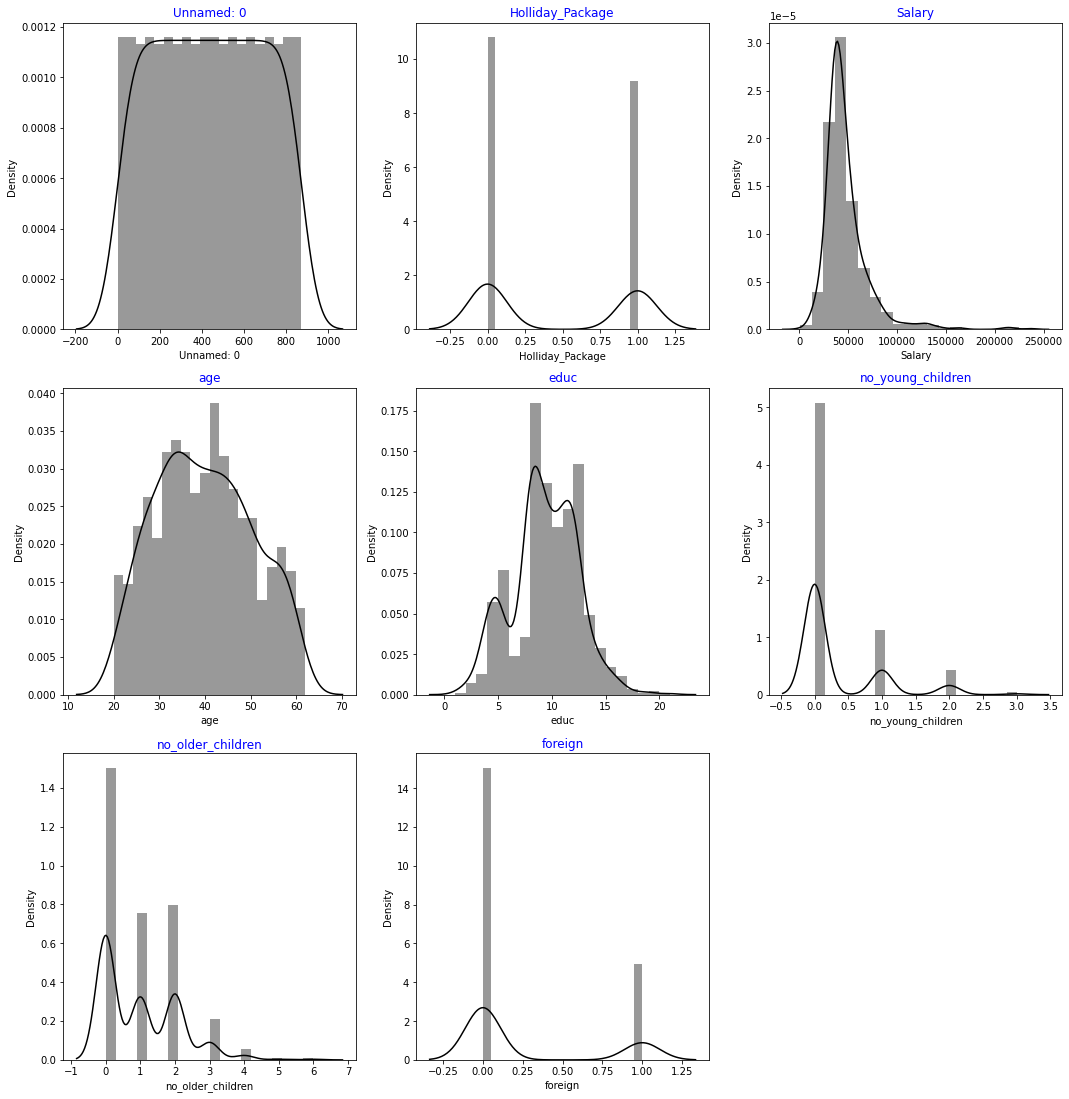

In [16]:
data_scatter=tour_df.copy(deep=True)
fig=plt.figure(figsize=(15,20))
for i in range(0,len(data_scatter.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.distplot(data_scatter[data_scatter.columns[i]], bins=20, color= 'Black')
    ax.set_title(data_scatter.columns[i],color='Blue')
plt.tight_layout()

### Bivariate Analysis

Unnamed: 0 vs foreign


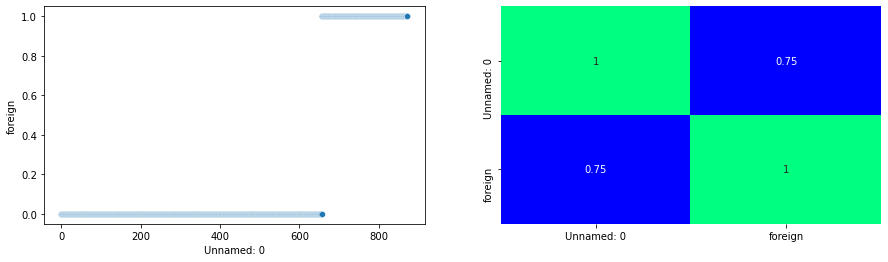

Holliday_Package vs Unnamed: 0


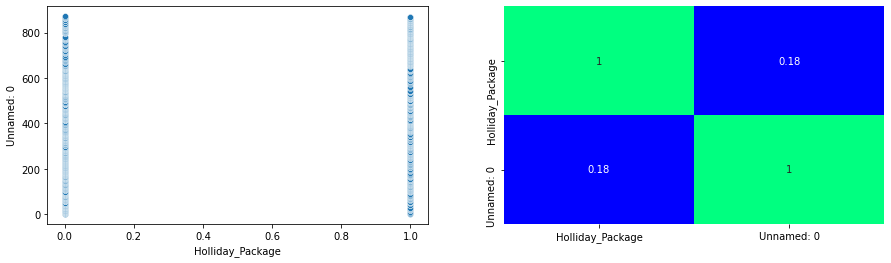

Salary vs Holliday_Package


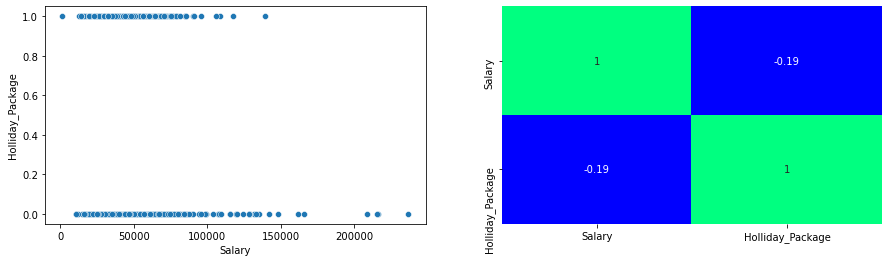

age vs Salary


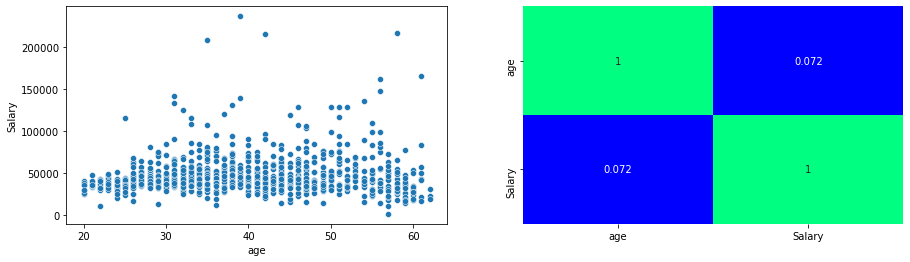

educ vs age


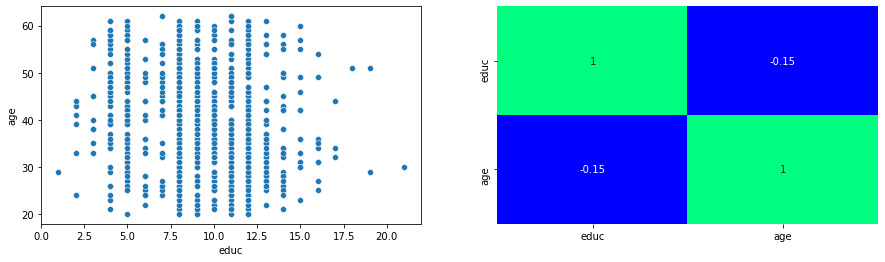

no_young_children vs educ


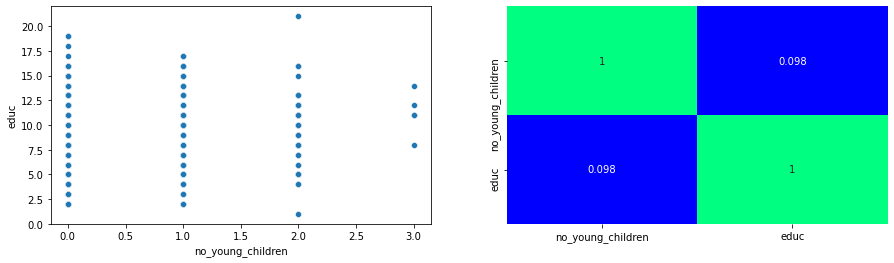

no_older_children vs no_young_children


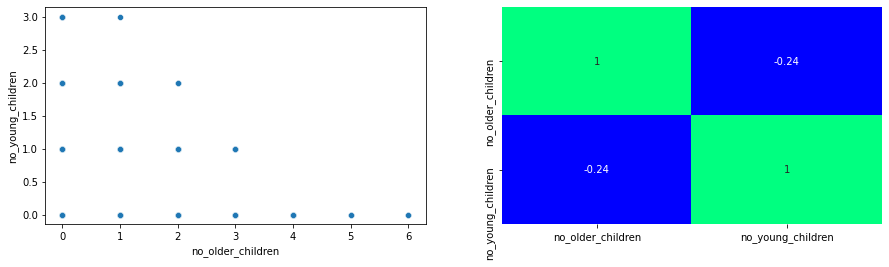

foreign vs no_older_children


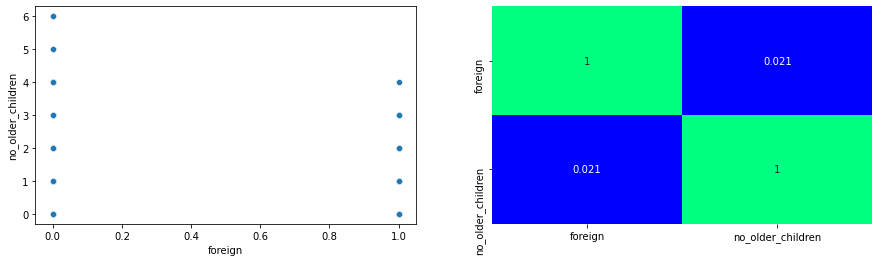

In [18]:
sns.color_palette("tab10")

cont_cols = list(tour_df.columns)
for col in range(0,len(cont_cols)):
    print(cont_cols[col],'vs',cont_cols[col-1])
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.scatterplot(tour_df[cont_cols[col]],tour_df[cont_cols[col-1]])
    plt.subplot(1,2,2)
    sns.heatmap(np.corrcoef(tour_df[cont_cols[col]],tour_df[cont_cols[col-1]]),annot=True, 
                yticklabels=[cont_cols[col],cont_cols[col-1]],xticklabels=[cont_cols[col],cont_cols[col-1]]
               ,cmap='winter',cbar=False)
    plt.show()

<AxesSubplot:>

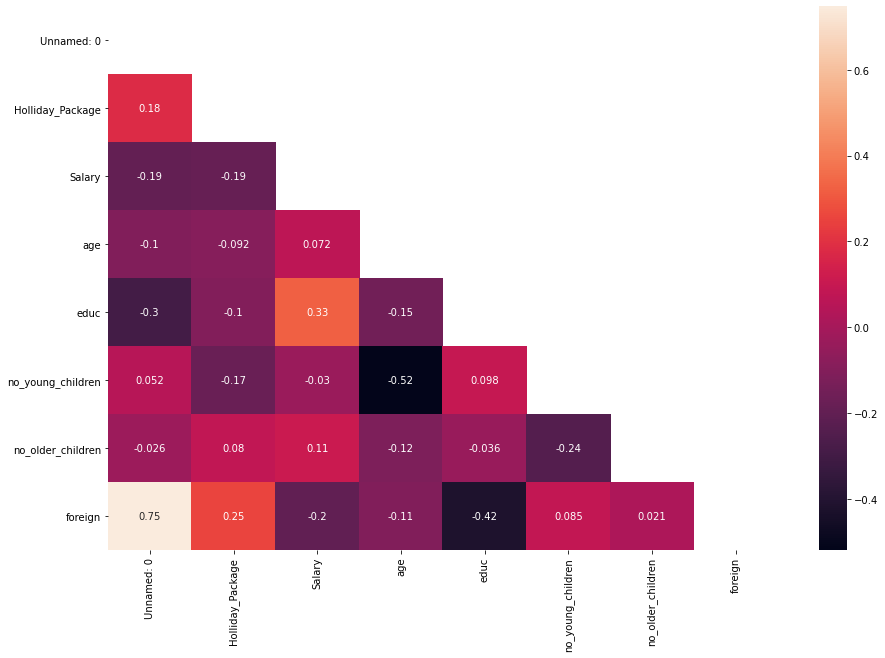

In [19]:
sns.color_palette("tab10")
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(tour_df.corr(), dtype=bool))
sns.heatmap(tour_df.corr(),annot = True,mask=mask)

There is high positive correlation among foreign and Unnamed: 0 variables whereas the other variables have least and negative correlation among them.

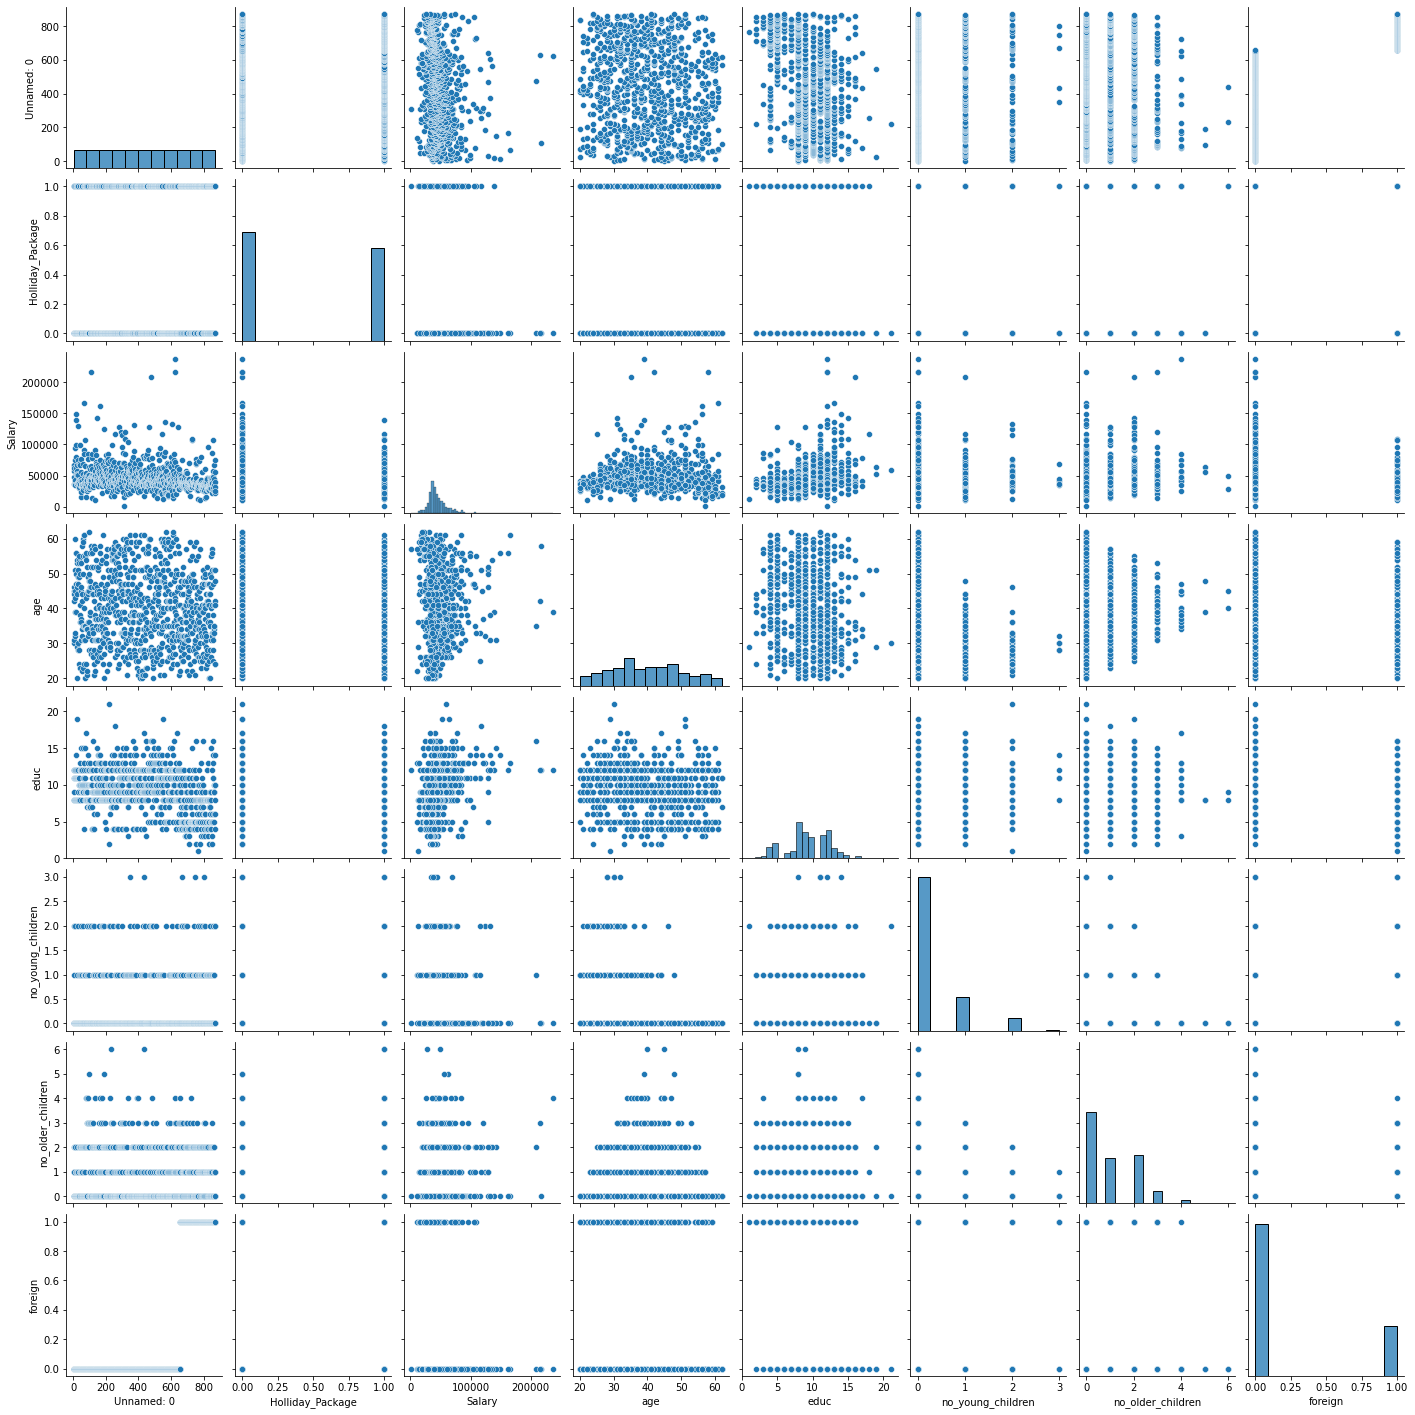

In [20]:
sns.pairplot(tour_df);

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis)

In [25]:
travel_df = tour_df.copy()

In [26]:
travel_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,0,48412,30,8,1,1,0
1,2,1,37207,45,8,0,1,0
2,3,0,58022,46,9,0,0,0
3,4,0,66503,31,11,2,0,0
4,5,0,66734,44,12,0,2,0


In [32]:
X = travel_df.drop('Holliday_Package',axis=1)
Y = travel_df.pop('Holliday_Package')

In [33]:
from sklearn import metrics,model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1)

In [34]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


### Logistic Regression

In [256]:
# Fit the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### LDA Model

In [257]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)
clf.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Logistic Regression

In [309]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   10.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [259]:
#Predicting on Training and Test dataset
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [260]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.760409,0.239591
1,0.273276,0.726724
2,0.902705,0.097295
3,0.978079,0.021921
4,0.512851,0.487149


In [261]:
# Accuracy - Training Data and Test Data
lr_train_acc=model.score(X_train, Y_train)
lr_train_acc

0.6786885245901639

In [262]:
lr_test_acc=model.score(X_test, Y_test)
lr_test_acc

0.6374045801526718

AUC: 0.744
AUC: 0.744


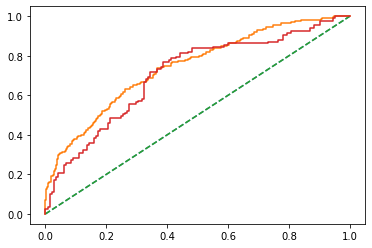

In [263]:
#AUC and ROC for the training data
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr);


#AUC and ROC for the test data
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr);

In [264]:
#Confusion Matrix for the training data
confusion_matrix(Y_train, ytrain_predict)

array([[252,  74],
       [122, 162]], dtype=int64)

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.69      0.57      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



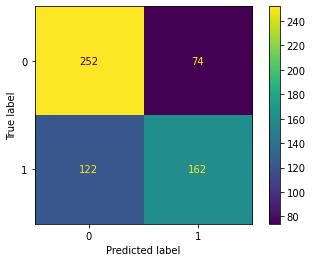

In [265]:
plot_confusion_matrix(model,X_train,Y_train);
print(classification_report(Y_train, ytrain_predict))

In [266]:
#Confusion Matrix for test data
confusion_matrix(Y_test, ytest_predict)

array([[102,  43],
       [ 52,  65]], dtype=int64)

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



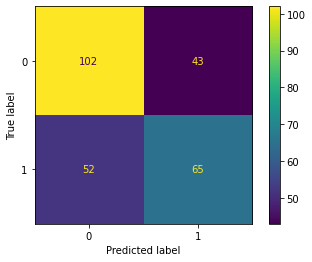

In [267]:
plot_confusion_matrix(model,X_test,Y_test);
print(classification_report(Y_test, ytest_predict))

In [268]:
# Applying GridSearchCV for Logistic Regression
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [269]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [270]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [271]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [272]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2)


In [273]:
best_model = grid_search.best_estimator_

In [274]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [275]:
# Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.628400,0.371600
1,0.517955,0.482045
2,0.559374,0.440626
3,0.728628,0.271372
4,0.504930,0.495070


              precision    recall  f1-score   support

           0       0.53      0.90      0.67       326
           1       0.42      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.47      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610
 



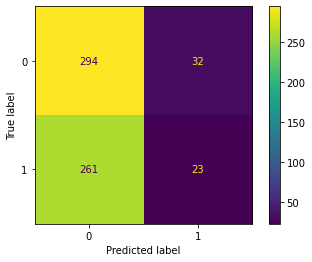

In [276]:
# Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,Y_train)
print(classification_report(Y_train, ytrain_predict),'\n');

In [311]:
confusion_matrix(Y_train, ytrain_predict)

array([[294,  32],
       [261,  23]], dtype=int64)

In [277]:
lr_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
DF=pd.DataFrame(lr_metrics).transpose()
lr_train_precision=round(DF.loc["1"][0],2)
lr_train_recall=round(DF.loc["1"][1],2)
lr_train_f1=round(DF.loc["1"][2],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.42
lr_train_recall  0.08
lr_train_f1  0.14


              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.38      0.09      0.14       117

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.41       262
weighted avg       0.47      0.53      0.44       262
 



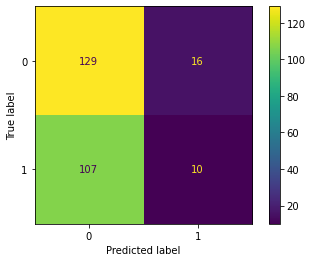

In [278]:
# Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,Y_test)
print(classification_report(Y_test, ytest_predict),'\n');

In [310]:
confusion_matrix(Y_test, ytest_predict)

array([[129,  16],
       [107,  10]], dtype=int64)

In [279]:
lr_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
DF=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(DF.loc["1"][0],2)
lr_test_recall=round(DF.loc["1"][1],2)
lr_test_f1=round(DF.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.38
lr_test_recall  0.09
lr_test_f1  0.14


### Logistic Regression conclusion
Train Data:         
AUC : 67.8%              
Accuracy: 67%             
Precision: 42%             
Recall: 8%           
f1-Score: 14%             

Test Data:                          
AUC: 63.7%              
Accuracy: 64%            
Precision: 38%              
Recall: 9%                    
f1-Score: 14%    

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

### LDA Model

In [312]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [294]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [295]:
lda_train_acc= model.score(X_train, Y_train)
lda_train_acc

0.6721311475409836

In [296]:
lda_test_acc= model.score(X_test, Y_test)
lda_test_acc

0.6412213740458015

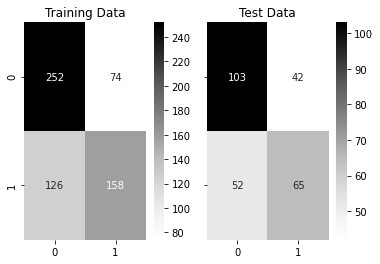

In [297]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [298]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



In [299]:
lda_metrics=classification_report(Y_train,pred_class_train,output_dict=True)
DF=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(DF.loc["1"][0],2)
lda_train_recall=round(DF.loc["1"][1],2)
lda_train_f1=round(DF.loc["1"][2],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.68
lda_train_recall  0.56
lda_train_f1  0.61


In [300]:
lda_metrics=classification_report(Y_test,pred_class_test,output_dict=True)
DF=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(DF.loc["1"][0],2)
lda_test_recall=round(DF.loc["1"][1],2)
lda_test_f1=round(DF.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.61
lda_test_recall  0.56
lda_test_f1  0.58


In [301]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [302]:
pred_prob_train[:,1]

array([0.24451841, 0.74473838, 0.02926233, 0.33696244, 0.53643674,
       0.77166141, 0.42537442, 0.29503123, 0.22447685, 0.30070348,
       0.28534521, 0.25472358, 0.36253223, 0.49555106, 0.43238182,
       0.76289172, 0.76180657, 0.13440254, 0.43765202, 0.8874783 ,
       0.70795813, 0.17152298, 0.21548115, 0.63053721, 0.2367007 ,
       0.32348888, 0.64312884, 0.32722211, 0.85239686, 0.28937042,
       0.70512591, 0.80009771, 0.52040802, 0.27686374, 0.3164615 ,
       0.54760845, 0.52040327, 0.31517416, 0.44152214, 0.06906226,
       0.34406846, 0.54935353, 0.29231453, 0.88221405, 0.07678677,
       0.76222865, 0.68956941, 0.1184114 , 0.06581715, 0.55511382,
       0.47496466, 0.24377183, 0.66339382, 0.45779134, 0.89305876,
       0.44876138, 0.65167779, 0.2604166 , 0.68041423, 0.33655869,
       0.3568944 , 0.25495093, 0.18266474, 0.11733085, 0.30783826,
       0.36037879, 0.54026683, 0.58991236, 0.06395937, 0.59328948,
       0.63404283, 0.23717375, 0.38986934, 0.78549853, 0.37122

AUC for the Training Data: 0.744
AUC for the Test Data: 0.744


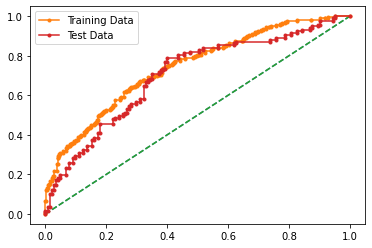

In [303]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### LDA conclusion
Train Data:         
AUC : 74%     
Accuracy: 67%       
Precision: 68%      
Recall: 56%     
f1-Score: 61%    

Test Data:               
AUC: 74%        
Accuracy: 64%              
Precision: 61%          
Recall: 56%        
f1-Score: 58%        

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

### Comparing the performance metrix for both models

In [304]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'lr Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'lr Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'lda Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1], 
        'lda Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,lr Train,lr Test,lda Train,lda Test
Accuracy,0.68,0.64,0.67,0.64
AUC,0.74,0.70,0.74,0.70
Recall,0.08,0.09,0.56,0.56
Precision,0.42,0.38,0.68,0.61
F1 Score,0.14,0.14,0.61,0.58


### ROC Curve for both models on Train data

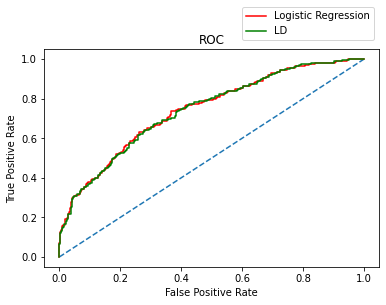

In [305]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="Logistic Regression")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LD")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for both models on Test data

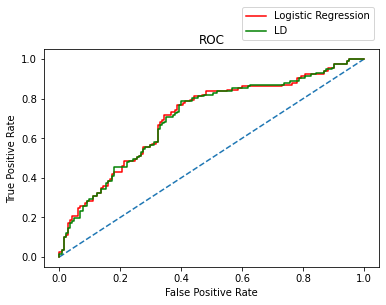

In [306]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="Logistic Regression")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LD")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 2 models, both Logistic regression and LDA has equal better performance with very minimal changes.

Overall the 2 models are reasonably stable enough to be used for making any future predictions. From Logistic Regression and LDA Model, the variable change is found to be the most useful feature amongst all other features for the company in predicting whether an employee will opt for the package or not. If change is yes, then the agency faces higher possibilities to sell their package.

### 2.4  Inference: Basis on these predictions, what are the insights and recommendations.


#### Logistic Regression:
Train Data:
AUC : 67.8%
Accuracy: 67%
Precision: 42%
Recall: 8%
f1-Score: 14%
Test Data:
AUC: 63.7%
Accuracy: 64%
Precision: 38%
Recall: 9%
f1-Score: 14%

#### LDA Conclusion:
Train Data:
AUC : 74%
Accuracy: 67%
Precision: 68%
Recall: 56%
f1-Score: 61%
Test Data:
AUC: 74%
Accuracy: 64%
Precision: 61%
Recall: 56%
f1-Score: 58%

Based on the both models of predictive modeling, each model is performed and the values of precision, accuracy, f1- score, Recall, AUC and Roc curve are derived.

Recommendation:
Overall both the  models are reasonably stable enough to be used for making any future predictions. From Logistic Regression and LDA Model, the variable change is found to be the most useful feature amongst all other features for the company in predicting whether an employee will opt for the package or not. If change is yes, then the agency faces higher possibilities to sell their package.
Therefore on the given above data LDA model is good in their performance.
